In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-consumption-classification/drug_consumption.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [3]:
df = pd.read_csv('/kaggle/input/drug-consumption-classification/drug_consumption.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [5]:
df.shape

(1885, 32)

In [6]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


**Missing Value Check**

In [7]:
df.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

**Duplicated value check**

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


# **2. Data Transform**

**I referred to the link below.**\
https://www.kaggle.com/code/mexwell/starter-notebook-convert-column-values?kernelSessionId=170055739 

In [10]:
age = {
          -0.95197: '18-24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'
          }

gender = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }

education = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }

country = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }

ethnicity = {
            -0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'
            }

usage = {
    'CL0': 'Never Used',
    'CL1': 'Used over a Decade Ago',
    'CL2': 'Used in Last Decade',
    'CL3': 'Used in Last Year',
    'CL4': 'Used in Last Month',
    'CL5': 'Used in Last Week',
    'CL6': 'Used in Last Day',
    }


In [11]:
df['Age'] = df['Age'].replace(age)
df['Gender'] = df['Gender'].replace(gender)
df['Education'] = df['Education'].replace(education)
df['Country'] = df['Country'].replace(country)
df['Ethnicity'] = df['Ethnicity'].replace(ethnicity)
df['Alcohol'] = df['Alcohol'].replace(usage)
df['Amphet'] = df['Amphet'].replace(usage)
df['Amyl'] = df['Amyl'].replace(usage)
df['Benzos'] = df['Benzos'].replace(usage)
df['Caff'] = df['Caff'].replace(usage)
df['Cannabis'] = df['Cannabis'].replace(usage)
df['Choc'] = df['Choc'].replace(usage)
df['Coke'] = df['Coke'].replace(usage)
df['Crack'] = df['Crack'].replace(usage)
df['Ecstasy'] = df['Ecstasy'].replace(usage)
df['Heroin'] = df['Heroin'].replace(usage)
df['Ketamine'] = df['Ketamine'].replace(usage)
df['Legalh'] = df['Legalh'].replace(usage)
df['LSD'] = df['LSD'].replace(usage)
df['Meth'] = df['Meth'].replace(usage)
df['Mushrooms'] = df['Mushrooms'].replace(usage)
df['Nicotine'] = df['Nicotine'].replace(usage)
df['Semer'] = df['Semer'].replace(usage)
df['VSA'] = df['VSA'].replace(usage)

**Data Check**

In [12]:
df.head(3)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used


# **3. Data Visualization**

In [13]:
num_cols = df.select_dtypes(include=['float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

**Histogram**

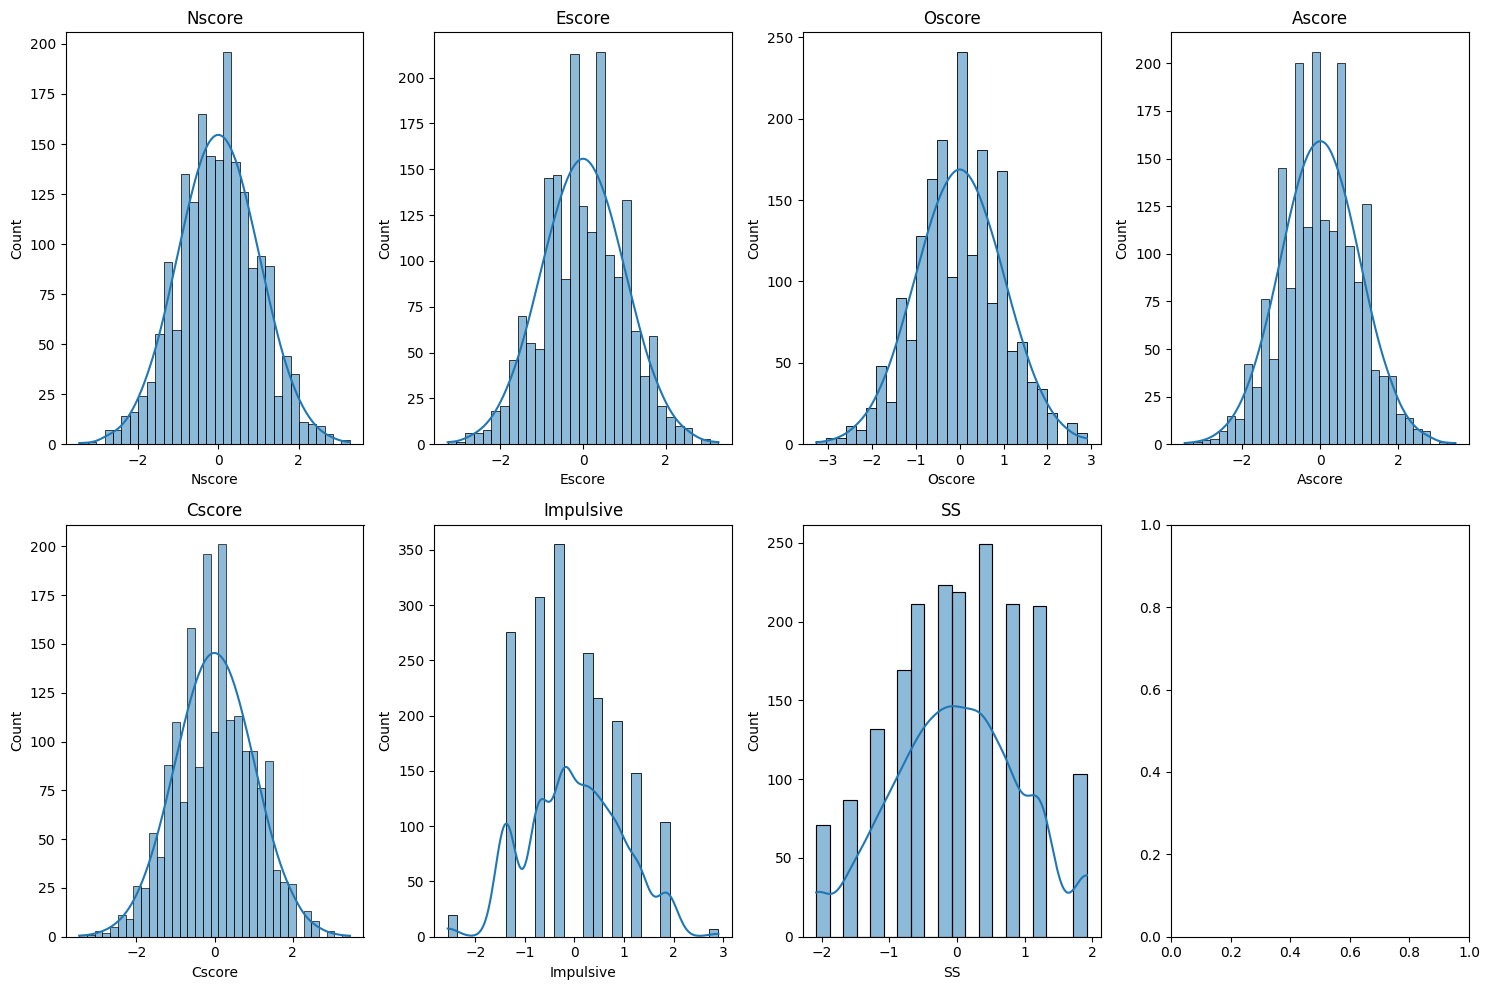

In [14]:
f, ax = plt.subplots(2,4 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x = cols , ax= ax[index], kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

**Boxplot**

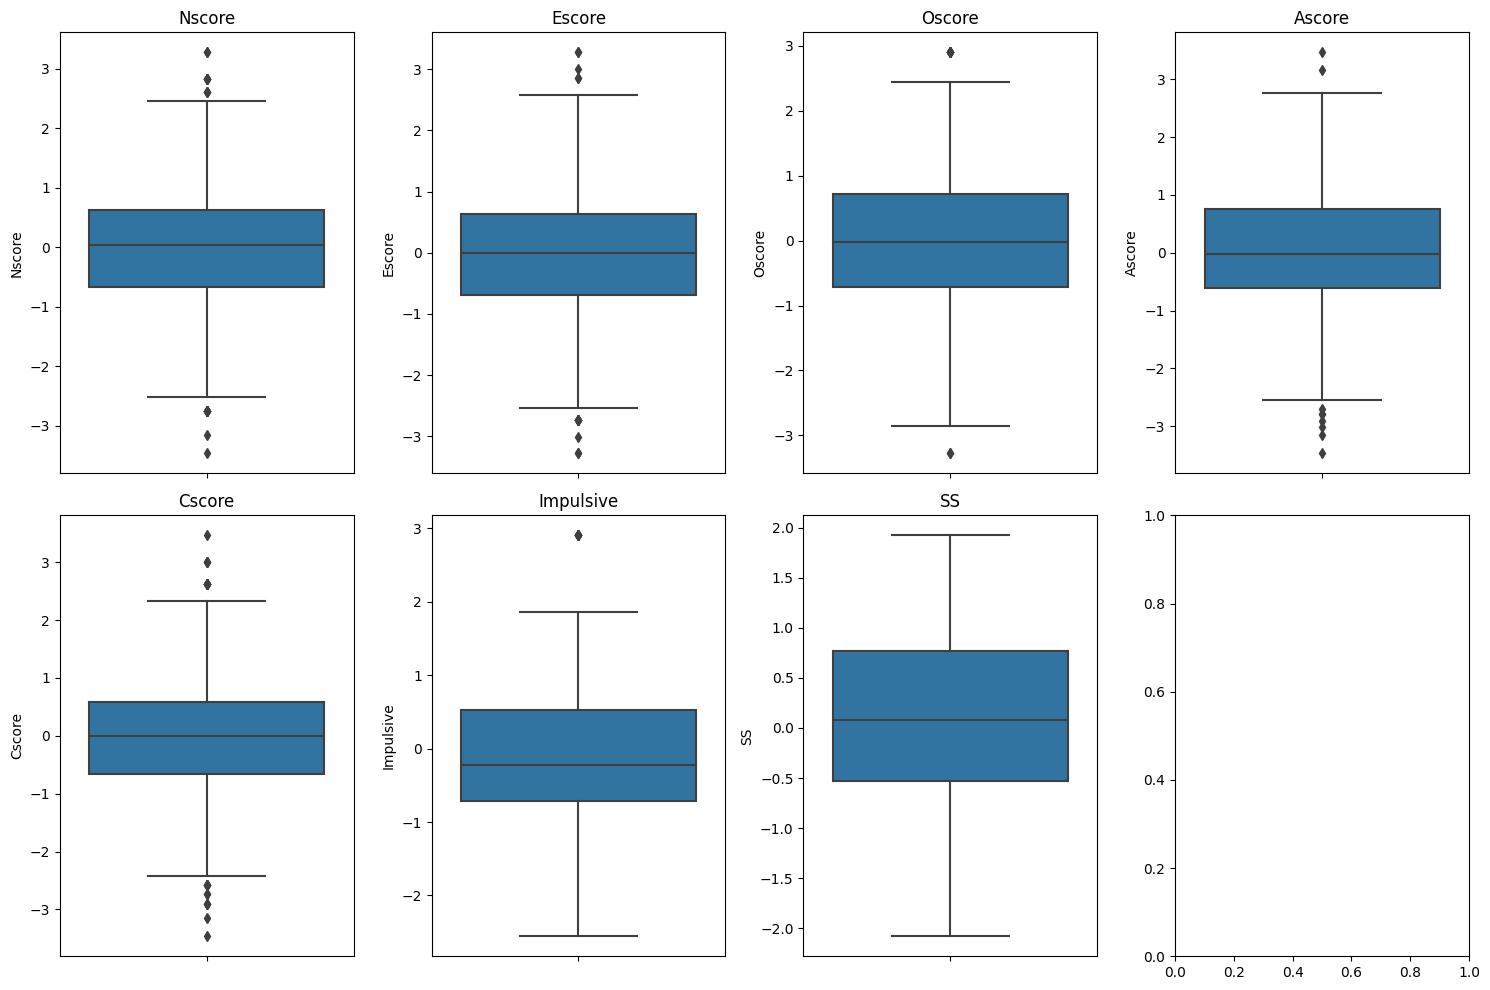

In [15]:
f, ax= plt.subplots(2,4 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(data = df, y = cols , ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()

---------

**Alcohol use by age**

In [16]:
age_alcohol = df.groupby(['Age','Alcohol']).size().reset_index(name='count')

In [17]:
age_alcohol

,Age,Alcohol,count
0,18-24,Never Used,14
1,18-24,Used in Last Day,149
2,18-24,Used in Last Decade,13
3,18-24,Used in Last Month,121
4,18-24,Used in Last Week,271
5,18-24,Used in Last Year,75
6,25 - 34,Never Used,9
7,25 - 34,Used in Last Day,123
8,25 - 34,Used in Last Decade,15
9,25 - 34,Used in Last Month,70


In [18]:
px.bar(age_alcohol, y= 'count', x = 'Age' , color = 'Alcohol', barmode = 'group', title = 'Alcohol use by age', text_auto = True)

---------

**Alcohol use by Gender**

In [19]:
gender_alcohol = df.groupby(['Gender','Alcohol']).size().reset_index(name='count')

In [20]:
gender_alcohol

,Gender,Alcohol,count
0,Female,Never Used,15
1,Female,Used in Last Day,230
2,Female,Used in Last Decade,32
3,Female,Used in Last Month,152
4,Female,Used in Last Week,403
5,Female,Used in Last Year,93
6,Female,Used over a Decade Ago,17
7,Male,Never Used,19
8,Male,Used in Last Day,275
9,Male,Used in Last Decade,36


In [21]:
px.bar(gender_alcohol, y= 'count', x = 'Gender' , color = 'Alcohol', barmode = 'group', title = 'Alcohol use by Gender', text_auto = True)

-------------

**Nicotine use by Age**

In [22]:
age_nicotine = df.groupby(['Age','Nicotine']).size().reset_index(name='count')

In [23]:
age_nicotine

,Age,Nicotine,count
0,18-24,Never Used,107
1,18-24,Used in Last Day,243
2,18-24,Used in Last Decade,48
3,18-24,Used in Last Month,68
4,18-24,Used in Last Week,84
5,18-24,Used in Last Year,91
6,18-24,Used over a Decade Ago,2
7,25 - 34,Never Used,109
8,25 - 34,Used in Last Day,152
9,25 - 34,Used in Last Decade,68


In [24]:
px.bar(age_nicotine , x='Age', y= 'count' , color = 'Nicotine', barmode = 'group', title = 'Nicotine use by Age', text_auto = True )

------

**Nicotine use by Gender**

In [25]:
gender_nicotine = df.groupby(['Gender','Nicotine']).size().reset_index(name='count')

In [26]:
gender_nicotine 

,Gender,Nicotine,count
0,Female,Never Used,275
1,Female,Used in Last Day,241
2,Female,Used in Last Decade,118
3,Female,Used in Last Month,46
4,Female,Used in Last Week,69
5,Female,Used in Last Year,87
6,Female,Used over a Decade Ago,106
7,Male,Never Used,153
8,Male,Used in Last Day,369
9,Male,Used in Last Decade,86


In [27]:
px.bar(gender_nicotine, y= 'count', x = 'Gender' , color = 'Nicotine', barmode = 'group', title = 'Nicotine use by Gender', text_auto = True)

--------

**UK alcohol use status**

In [28]:
UK = df[df['Country'] == 'UK']

In [29]:
UK_alcohol = UK.groupby(['Alcohol']).size().reset_index(name='count')

In [30]:
UK_alcohol

,Alcohol,count
0,Never Used,20
1,Used in Last Day,304
2,Used in Last Decade,33
3,Used in Last Month,124
4,Used in Last Week,461
5,Used in Last Year,80
6,Used over a Decade Ago,22


In [31]:
fig = px.pie(UK_alcohol , values = 'count',names= 'Alcohol',title = 'UK alcohol use status')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

-----------

**UK Nicotine use status**

In [32]:
UK_Nicotine = UK.groupby(['Nicotine']).size().reset_index(name='count')

In [33]:
UK_Nicotine

,Nicotine,count
0,Never Used,320
1,Used in Last Day,262
2,Used in Last Decade,145
3,Used in Last Month,48
4,Used in Last Week,64
5,Used in Last Year,63
6,Used over a Decade Ago,142


In [34]:
fig = px.pie(UK_Nicotine , values = 'count',names= 'Nicotine',title = 'UK Nicotine use status')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

---------

**Correlation**

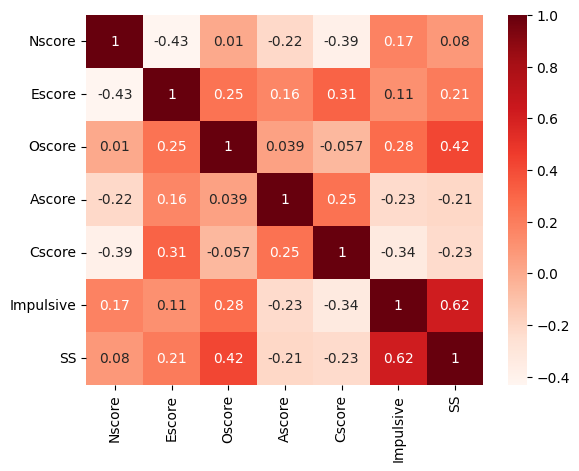

In [35]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds')
plt.show()

------

# **4. Modeling**

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
import xgboost as xgb


from sklearn.metrics import accuracy_score , classification_report

In [45]:
df = df.drop('ID', axis = 1)

In [47]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [103]:
X = df[num_cols]
Y = df['Alcohol']

In [106]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [155]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

**RandomForest**

In [156]:
RF = RandomForestClassifier(random_state=42)

In [157]:
RF.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [158]:
pred_RF = RF.predict(X_test)

In [159]:
print(classification_report(Y_test,pred_RF))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.19      0.22      0.21        92
           2       0.00      0.00      0.00        16
           3       0.20      0.03      0.05        68
           4       0.38      0.61      0.46       153
           5       0.12      0.06      0.08        34
           6       0.00      0.00      0.00         7

    accuracy                           0.31       377
   macro avg       0.13      0.13      0.11       377
weighted avg       0.25      0.31      0.26       377



In [160]:
print(f'accuracy : {accuracy_score(Y_test,pred_RF)}')

accuracy : 0.3103448275862069


---------

**Support Vector Machine**

In [161]:
SVM = SVC(C=1 , kernel = 'rbf')

In [162]:
SVM.fit(X_train,Y_train)

SVC(C=1)

In [163]:
pred_SVM = SVM.predict(X_test)

In [164]:
print(classification_report(Y_test,pred_SVM))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.31      0.12      0.17        92
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        68
           4       0.41      0.92      0.57       153
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00         7

    accuracy                           0.40       377
   macro avg       0.10      0.15      0.11       377
weighted avg       0.24      0.40      0.27       377



In [165]:
print(f'accuracy : {accuracy_score(Y_test,pred_SVM)}')

accuracy : 0.40318302387267907


--------

**XGBoost**

In [166]:
XGB = xgb.XGBRFClassifier(random_state = 42)

In [167]:
XGB.fit(X_train,Y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=42, reg_alpha=None, ...)

In [168]:
pred_XGB = XGB.predict(X_test)

In [169]:
print(classification_report(Y_test,pred_XGB))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.22      0.11      0.14        92
           2       0.00      0.00      0.00        16
           3       0.50      0.01      0.03        68
           4       0.42      0.87      0.56       153
           5       0.11      0.03      0.05        34
           6       0.00      0.00      0.00         7

    accuracy                           0.38       377
   macro avg       0.18      0.15      0.11       377
weighted avg       0.32      0.38      0.27       377



In [171]:
print(f'accuracy : {accuracy_score(Y_test,pred_XGB)}')

accuracy : 0.38461538461538464


---------

**DNN**

In [172]:
DNN = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(Y)), activation='softmax')])

In [173]:
DNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [174]:
DNN.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3353 - loss: 1.7776
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4111 - loss: 1.5387
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3988 - loss: 1.5456
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3998 - loss: 1.5204
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4036 - loss: 1.4999
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4193 - loss: 1.4842
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3987 - loss: 1.4974
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4086 - loss: 1.4730
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4328 - loss: 1.4417
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4148 - loss: 1.4743
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4558 - loss: 1.4202
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4271 - lo

In [175]:
pred_DNN_prob = DNN.predict(X_test)
pred_DNN = np.argmax(pred_DNN_prob, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [176]:
print(classification_report(Y_test, pred_DNN))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.26      0.30      0.28        92
           2       0.00      0.00      0.00        16
           3       0.27      0.04      0.08        68
           4       0.42      0.68      0.52       153
           5       0.22      0.06      0.09        34
           6       0.00      0.00      0.00         7

    accuracy                           0.36       377
   macro avg       0.17      0.16      0.14       377
weighted avg       0.30      0.36      0.30       377



In [177]:
print(f'accuracy : {accuracy_score(Y_test,pred_DNN)}')

accuracy : 0.363395225464191


------------

**Please leave your advice in the comments. Thank you**